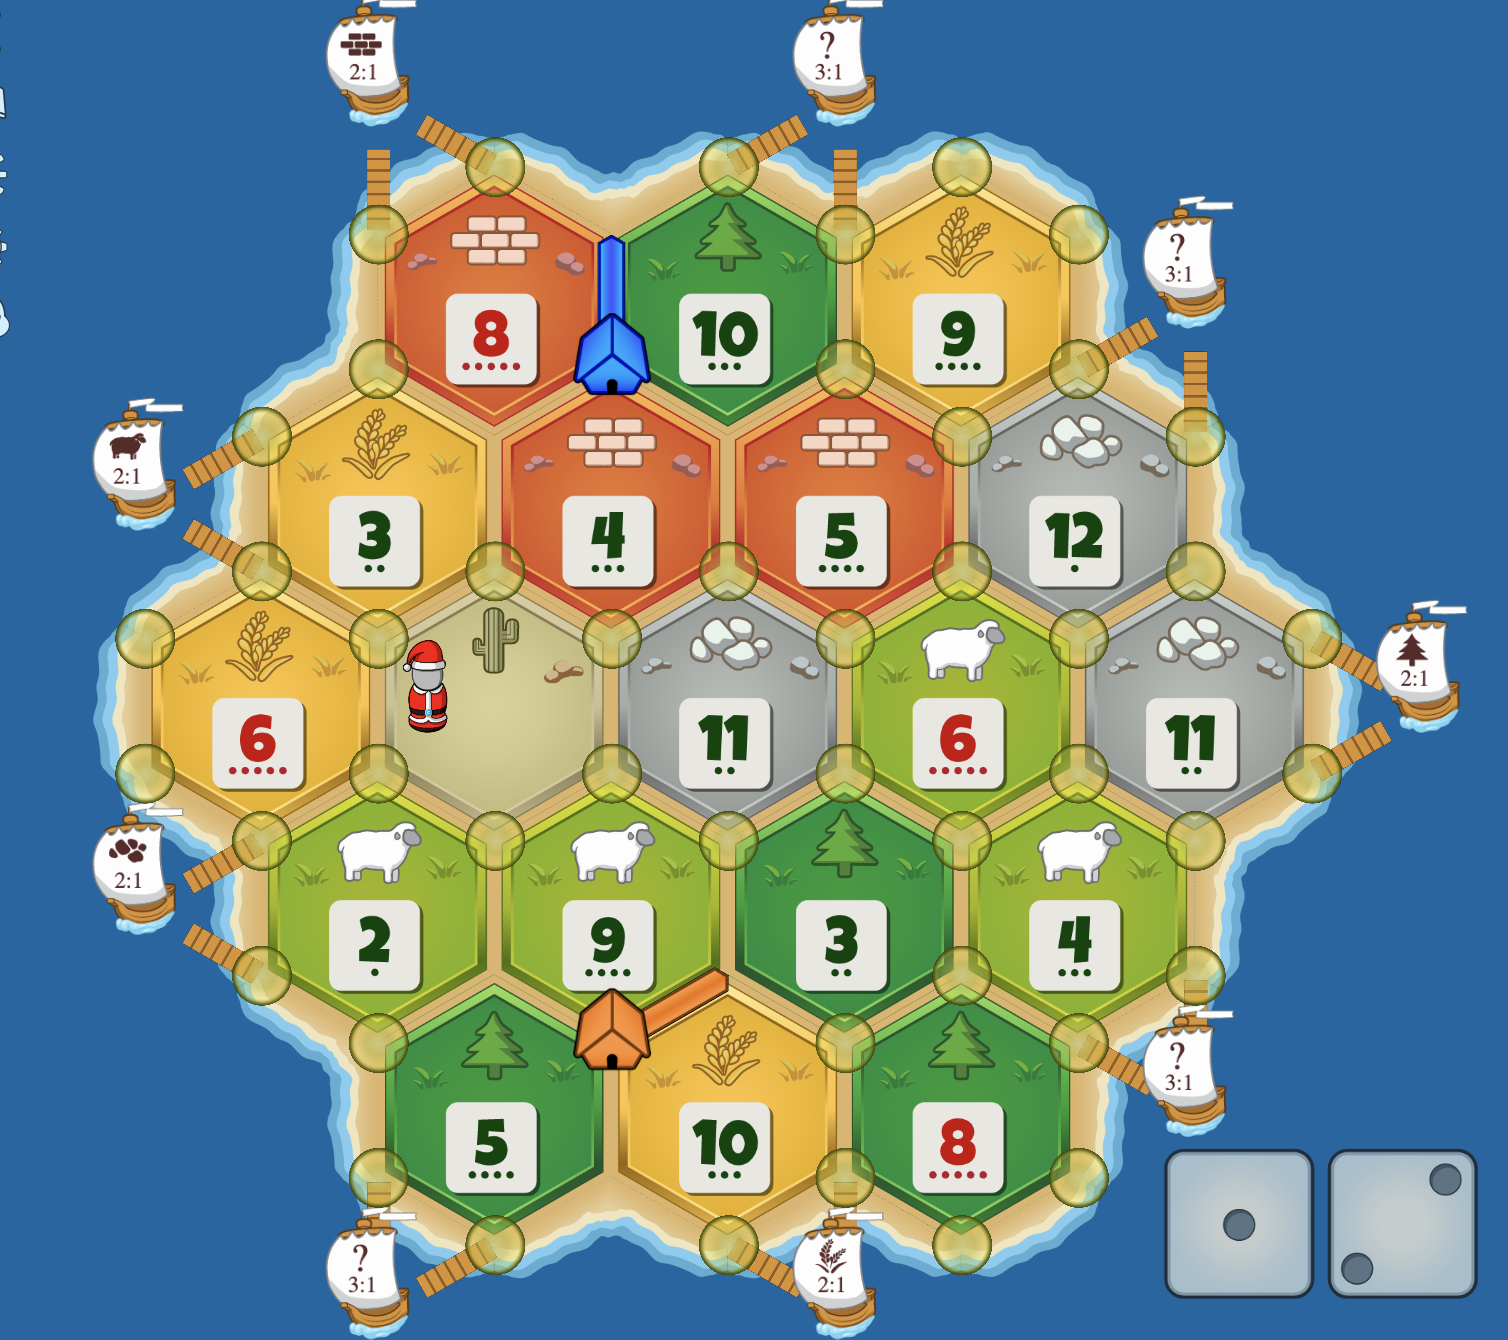

In [6]:
import networkx as nx
import random

# Create lists of required terrain types and probabilities
required_terrains = ['forest', 'forest', 'forest', 'forest', 'sheep', 'sheep', 'sheep', 'sheep', 'wheat', 'wheat', 'wheat', 'wheat', 'brick', 'brick', 'brick', 'stone', 'stone', 'stone']
required_probabilities = [2, 3, 3, 4, 4, 5, 5, 6, 6, 8, 8, 9, 9, 10, 10, 11, 11, 12]

# Shuffle the lists to randomly assign values to the nodes
random.shuffle(required_terrains)
random.shuffle(required_probabilities)

# choose a random index to insert desert terrain with probability 0
index = random.randint(0, 19)
required_terrains.insert(index, 'desert')
required_probabilities.insert(index, 0)

# Create an empty graph
G = nx.Graph()

# Add nodes to the graph, representing each tile on the board
for i in range(19):  # There are 19 tiles on a Catan board
    # Assign the next value in the list to the node's attributes
    terrain = required_terrains[i]
    probability = required_probabilities[i]
    G.add_node(i, terrain=terrain, probability=probability)

# Add edges to the graph, representing the connections between tiles
G.add_edges_from([(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (2, 4),
                  (3, 4), (3, 5), (4, 5), (4, 6), (5, 6), (5, 7),
                  (6, 7), (6, 8), (7, 8), (7, 9), (8, 9), (8, 10),
                  (9, 10), (9, 11), (10, 11), (10, 12), (11, 12),
                  (11, 13), (12, 13), (12, 14), (13, 14), (13, 15),
                  (14, 15), (14, 16), (15, 16), (15, 17), (16, 17),
                  (16, 18), (17, 18)])


# You can also use NetworkX functions to analyze the graph, such as finding the shortest path between two tiles
shortest_path = nx.shortest_path(G, source=0, target=18)
print(shortest_path)  # Outputs the shortest path between tiles 0 and 18

sheep
10
[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]


In [10]:
import pandas as pd

# Create a list of labels for the nodes, using the terrain type and probability attributes
labels = {}
for node in G.nodes:
    labels[node] = f"{G.nodes[node]['terrain']}\n{G.nodes[node]['probability']}"

# Convert the graph to a Pandas DataFrame
df = nx.to_pandas_edgelist(G)

# Add the terrain type and probability as columns to the DataFrame
df['terrain'] = [G.nodes[row['source']]['terrain'] for _, row in df.iterrows()]
df['probability'] = [G.nodes[row['source']]['probability'] for _, row in df.iterrows()]

# Print the DataFrame
print(df)

    source  target terrain  probability
0        0       1   sheep           10
1        0       2   sheep           10
2        1       2   brick           10
3        1       3   brick           10
4        2       3   wheat            9
5        2       4   wheat            9
6        3       4  desert            0
7        3       5  desert            0
8        4       5   wheat            6
9        4       6   wheat            6
10       5       6   sheep            4
11       5       7   sheep            4
12       6       7  forest            4
13       6       8  forest            4
14       7       8  forest            9
15       7       9  forest            9
16       8       9   stone            3
17       8      10   stone            3
18       9      10   stone            5
19       9      11   stone            5
20      10      11   brick            6
21      10      12   brick            6
22      11      12   stone           11
23      11      13   stone           11


In [14]:
for node in G.nodes:
    print(node, G.nodes[node]['terrain'], G.nodes[node]['probability'])

0 sheep 10
1 brick 10
2 wheat 9
3 desert 0
4 wheat 6
5 sheep 4
6 forest 4
7 forest 9
8 stone 3
9 stone 5
10 brick 6
11 stone 11
12 forest 11
13 wheat 12
14 sheep 8
15 forest 5
16 brick 3
17 wheat 8
18 sheep 2
